In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


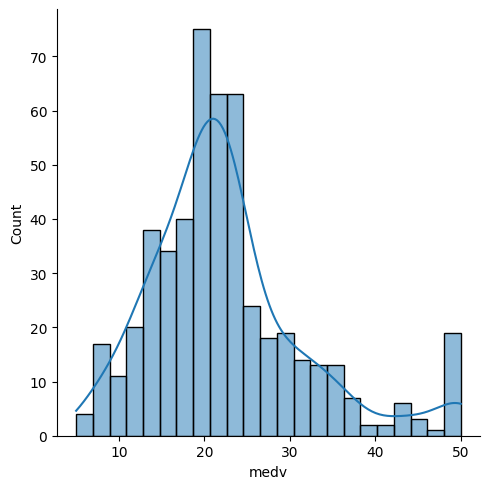

In [3]:
sns.displot(data=df.medv, kde=True)

In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.asarray(df.drop(["medv"], axis=1))
y = np.asarray(df["medv"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([30.77834822, 38.66581541, 16.96705276, 26.79035818, 20.36068008,
       24.89386356, 18.98948959, 15.44554414, 24.50205701, 22.12455513,
       27.16709892, 20.60218969, -4.91312377, 23.45520373, 20.44300739,
       27.97454642, 21.82481134,  6.80793603, 43.13876668, 19.08804672,
       28.93737925, 31.91943808, 12.05148619, 25.41493356, 19.60614164,
       17.23543021, 24.61263361, 16.907528  , 24.25623469, 20.73183868,
       23.98650325, 26.66317526, 27.45468242, 19.57475267, 18.15660164,
       19.94422395, 33.04896681, 21.26475982, 25.83570427, 26.36436267,
       15.22545112, 33.61610719, 45.24385042, 18.83620774, 28.91584593,
       18.49470905, 14.91054896, 27.65199578, 21.75498681, 32.36964545,
       23.36168054, 36.5955736 , 16.82098601, 27.59874838, 42.39261672,
       24.39945725, 20.42785358, 34.46608842, 26.52068304, 14.0304141 ,
       24.03170468, 32.40960974, 33.59067192, 17.33583061, 22.46180876,
       18.28308242, 22.01801285, 27.57486429, 32.54366102, 13.95

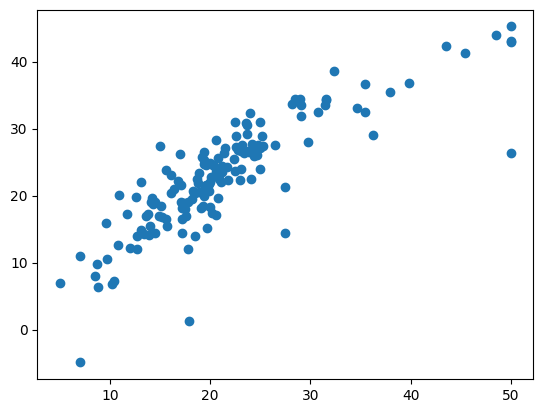

In [13]:
plt.scatter(y_test, y_pred)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

RMSE:  4.912717301969204
R2:  0.6761000049033603
